# HOUSE OF THE DRAGON - NLP Analysis using Twitter Data

*Author: Olalekan Fagbuyi*

The first season of HBO's blockbuster fantasy series **House of the Dragon** (HOTD) wrapped up on the 23rd of October 2022. The series which is a prequel to popular **Game of Thrones** drama broke [viewership](https://variety.com/2022/tv/news/house-of-the-dragon-finale-ratings-viewers-1235412702/) records with an average of  9.5m live viewers per episode. It was also highly rated by fans with an [IMDB Score](https://www.imdb.com/title/tt11198330/) of 8.8/10

This project collates 200,000 tweets across 10 episodes (approximately 20,000 tweets per episode) to perform a Natural Processing Language analysis. Sentiment analysis, top tweet locations,most popular characters and common words used by fans were analysed using various Python libraries.

## Table of Contents

1. Importing Libraries
2. Data Minning
3. Data Pre-processing
4. Top Tweet Locations
5. Text Processing
6. Most Popular Characters
7. Sentiment Analysis - Polarity and Subjectivity
8. Word Distribtuion

## 1. Importing Libraries

A number of libraries were used to bring this project to life, they include;

i.   Core python packages - pandas and np

ii:  Vizualization packages - matplotlib, seaborn, plotly

iii: Webscrapping package - snsscrape for minning data from twitter 

iv:  Natural language processing packages - nltk, re, stop_words, FreqDistr, PI,L et al to process textual data

In [642]:
#import libraries

#core python packages for data analysis and arithmetics
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', None)

#vizualization packages
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
import plotly.express as px
style.use('ggplot')

#for scrapping tweets on twitter
import snscrape.modules.twitter as sntwitter 

#word processing pakcages
import re #for RegEx (regular experessions) which is a sequence of characters that forms a search pattern.
import string
from textblob import TextBlob #for processing textual data
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords") 
nltk.download('punkt')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from nltk.probability import FreqDist
import os
from PIL import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ofagb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ofagb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ofagb\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## 2. Data Mining

Data was sourced from twitter using the snscrape package. This packages is used for getting information such as user texts, profile information, hashtags, or searches from social media websites.
200,000 tweets (20,000 per episode) was scrapped across the 3 month period from August to October which the series ran. The 3 separate dataframes will be joined in the next section

In [390]:
#hotd1_df - October 2022 tweets - Episode 7 to 10
maxTweets = 80000
# Creating list to append tweet data to
tweets_list = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper
                         ('#HouseoftheDragon since:2022-10-01 until:2022-10-24 lang:"en"').get_items()):
    if i>maxTweets:
        break
    tweets_list.append([tweet.date, tweet.id, tweet.user.username, tweet.user.location,tweet.content])

In [533]:
# Creating a dataframe from the tweets list above
hotd1_df = pd.DataFrame(tweets_list, columns=['Datetime', 'Tweet Id', 'Username', 'Location', 'Text'])
hotd1_df.head()

,Datetime,Tweet Id,Username,Location,Text
0,2022-09-29 23:57:52+00:00,1575636004459118592,infinitewondr,Massachusetts,@HOTDsource Thank you! @GRRMspeaking #houseofthedragon loving the show!
1,2022-09-29 23:56:48+00:00,1575635738246324224,jeremyth_vm,,The House of dragon is being one of my current favorite series\n\n@HouseofDragonLA\n\n#houseofthedragon #GOT #gameofthrones #drawing #draw #sketch #ilustracion #illustration #sketchbook #oc #digitalart #comic #fanart #artoftheday #digitaldrawing #hotd #art #hbo https://t.co/RWxef6ZJ7v
2,2022-09-29 23:55:27+00:00,1575635398373408768,lauvamp_,Spain 🇪🇸,"Episode 4, double 😱😱 literally my face #HouseOfTheDragon"
3,2022-09-29 23:54:38+00:00,1575635191476781057,firelrd_zuko,,Queen Alicent was in Ouija? 😨\n#HouseofTheDragon https://t.co/CrFFT0vhMV
4,2022-09-29 23:50:17+00:00,1575634099389157377,LuxuriousChaos,"Utah, USA","@AmazonHelp @TedVillavicenc Also @HBOMAX, what the hell is wrong with YOU, stop writing off stuff and pulling them from platforms for tax write-offs. It's fucking bullshit.\n\nI'll pull the plug on my subscription and will start pirating all the seasons of ER and every episode of #HouseOfTheDragon"


In [408]:
#hotd2_df - September 2022 tweets - Episode 3 to 6
maxTweets = 80000
# Creating list to append tweet data to
tweets_list = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper
                         ('#HouseoftheDragon since:2022-09-01 until:2022-09-30 lang:"en"').get_items()):
    if i>maxTweets:
        break
    tweets_list.append([tweet.date, tweet.id, tweet.user.username, tweet.user.location,tweet.content])

In [534]:
# Creating a dataframe from the tweets list above
hotd2_df = pd.DataFrame(tweets_list, columns=['Datetime', 'Tweet Id', 'Username', 'Location', 'Text'])
hotd2_df.head()

,Datetime,Tweet Id,Username,Location,Text
0,2022-09-29 23:57:52+00:00,1575636004459118592,infinitewondr,Massachusetts,@HOTDsource Thank you! @GRRMspeaking #houseofthedragon loving the show!
1,2022-09-29 23:56:48+00:00,1575635738246324224,jeremyth_vm,,The House of dragon is being one of my current favorite series\n\n@HouseofDragonLA\n\n#houseofthedragon #GOT #gameofthrones #drawing #draw #sketch #ilustracion #illustration #sketchbook #oc #digitalart #comic #fanart #artoftheday #digitaldrawing #hotd #art #hbo https://t.co/RWxef6ZJ7v
2,2022-09-29 23:55:27+00:00,1575635398373408768,lauvamp_,Spain 🇪🇸,"Episode 4, double 😱😱 literally my face #HouseOfTheDragon"
3,2022-09-29 23:54:38+00:00,1575635191476781057,firelrd_zuko,,Queen Alicent was in Ouija? 😨\n#HouseofTheDragon https://t.co/CrFFT0vhMV
4,2022-09-29 23:50:17+00:00,1575634099389157377,LuxuriousChaos,"Utah, USA","@AmazonHelp @TedVillavicenc Also @HBOMAX, what the hell is wrong with YOU, stop writing off stuff and pulling them from platforms for tax write-offs. It's fucking bullshit.\n\nI'll pull the plug on my subscription and will start pirating all the seasons of ER and every episode of #HouseOfTheDragon"


In [406]:
#hotd1_df - August 2022 tweets - Episode 1 and 2
maxTweets = 40000
# Creating list to append tweet data to
tweets_list = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper
                         ('#HouseoftheDragon since:2022-08-21 until:2022-08-31 lang:"en"').get_items()):
    if i>maxTweets:
        break
    tweets_list.append([tweet.date, tweet.id, tweet.user.username, tweet.user.location,tweet.content])

### 3. Data Pre-processing

Before performing any NLTK operations on the dataset, pre-processing steps will be carried out at this stage. Steps taken in this section includes; merging dataframes, checking dataframe information, deleting irrelevant columns, checking for null values, deleting duplicates, then finally saving as a csv file.

In [641]:
#merging dataframes
hotd_1_2 = [hotd1_df, hotd2_df]
 
hotd12 = pd.concat(hotd_1_2)
hotd12.head()

,Datetime,Tweet Id,Username,Location,Text
0,2022-09-29 23:57:52+00:00,1575636004459118592,infinitewondr,Massachusetts,@HOTDsource Thank you! @GRRMspeaking #houseofthedragon loving the show!
1,2022-09-29 23:56:48+00:00,1575635738246324224,jeremyth_vm,,The House of dragon is being one of my current favorite series\n\n@HouseofDragonLA\n\n#houseofthedragon #GOT #gameofthrones #drawing #draw #sketch #ilustracion #illustration #sketchbook #oc #digitalart #comic #fanart #artoftheday #digitaldrawing #hotd #art #hbo https://t.co/RWxef6ZJ7v
2,2022-09-29 23:55:27+00:00,1575635398373408768,lauvamp_,Spain 🇪🇸,"Episode 4, double 😱😱 literally my face #HouseOfTheDragon"
3,2022-09-29 23:54:38+00:00,1575635191476781057,firelrd_zuko,,Queen Alicent was in Ouija? 😨\n#HouseofTheDragon https://t.co/CrFFT0vhMV
4,2022-09-29 23:50:17+00:00,1575634099389157377,LuxuriousChaos,"Utah, USA","@AmazonHelp @TedVillavicenc Also @HBOMAX, what the hell is wrong with YOU, stop writing off stuff and pulling them from platforms for tax write-offs. It's fucking bullshit.\n\nI'll pull the plug on my subscription and will start pirating all the seasons of ER and every episode of #HouseOfTheDragon"


In [643]:
hotd_2_3 = [hotd12, hotd3_df]
 
hotd = pd.concat(hotd_2_3)
hotd.head()

,Datetime,Tweet Id,Username,Location,Text
0,2022-09-29 23:57:52+00:00,1575636004459118592,infinitewondr,Massachusetts,@HOTDsource Thank you! @GRRMspeaking #houseofthedragon loving the show!
1,2022-09-29 23:56:48+00:00,1575635738246324224,jeremyth_vm,,The House of dragon is being one of my current favorite series\n\n@HouseofDragonLA\n\n#houseofthedragon #GOT #gameofthrones #drawing #draw #sketch #ilustracion #illustration #sketchbook #oc #digitalart #comic #fanart #artoftheday #digitaldrawing #hotd #art #hbo https://t.co/RWxef6ZJ7v
2,2022-09-29 23:55:27+00:00,1575635398373408768,lauvamp_,Spain 🇪🇸,"Episode 4, double 😱😱 literally my face #HouseOfTheDragon"
3,2022-09-29 23:54:38+00:00,1575635191476781057,firelrd_zuko,,Queen Alicent was in Ouija? 😨\n#HouseofTheDragon https://t.co/CrFFT0vhMV
4,2022-09-29 23:50:17+00:00,1575634099389157377,LuxuriousChaos,"Utah, USA","@AmazonHelp @TedVillavicenc Also @HBOMAX, what the hell is wrong with YOU, stop writing off stuff and pulling them from platforms for tax write-offs. It's fucking bullshit.\n\nI'll pull the plug on my subscription and will start pirating all the seasons of ER and every episode of #HouseOfTheDragon"


In [644]:
#deleting redudant features
hotd.drop(['Datetime', 'Username','Tweet Id'], axis=1, inplace=True)
hotd.head()

,Location,Text
0,Massachusetts,@HOTDsource Thank you! @GRRMspeaking #houseofthedragon loving the show!
1,,The House of dragon is being one of my current favorite series\n\n@HouseofDragonLA\n\n#houseofthedragon #GOT #gameofthrones #drawing #draw #sketch #ilustracion #illustration #sketchbook #oc #digitalart #comic #fanart #artoftheday #digitaldrawing #hotd #art #hbo https://t.co/RWxef6ZJ7v
2,Spain 🇪🇸,"Episode 4, double 😱😱 literally my face #HouseOfTheDragon"
3,,Queen Alicent was in Ouija? 😨\n#HouseofTheDragon https://t.co/CrFFT0vhMV
4,"Utah, USA","@AmazonHelp @TedVillavicenc Also @HBOMAX, what the hell is wrong with YOU, stop writing off stuff and pulling them from platforms for tax write-offs. It's fucking bullshit.\n\nI'll pull the plug on my subscription and will start pirating all the seasons of ER and every episode of #HouseOfTheDragon"


In [645]:
#generate df info
hotd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200003 entries, 0 to 40000
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Location  200003 non-null  object
 1   Text      200003 non-null  object
dtypes: object(2)
memory usage: 4.6+ MB


In [646]:
#checking for unique values across columns
hotd.nunique()

Location     18619
Text        119356
dtype: int64

In [647]:
#Finding duplicates
hotd.duplicated(subset='Text').sum()

80647

In [649]:
#dropping duplicates
hotd = hotd.drop_duplicates('Text')
hotd

,Location,Text
0,Massachusetts,@HOTDsource Thank you! @GRRMspeaking #houseofthedragon loving the show!
1,,The House of dragon is being one of my current favorite series\n\n@HouseofDragonLA\n\n#houseofthedragon #GOT #gameofthrones #drawing #draw #sketch #ilustracion #illustration #sketchbook #oc #digitalart #comic #fanart #artoftheday #digitaldrawing #hotd #art #hbo https://t.co/RWxef6ZJ7v
2,Spain 🇪🇸,"Episode 4, double 😱😱 literally my face #HouseOfTheDragon"
3,,Queen Alicent was in Ouija? 😨\n#HouseofTheDragon https://t.co/CrFFT0vhMV
4,"Utah, USA","@AmazonHelp @TedVillavicenc Also @HBOMAX, what the hell is wrong with YOU, stop writing off stuff and pulling them from platforms for tax write-offs. It's fucking bullshit.\n\nI'll pull the plug on my subscription and will start pirating all the seasons of ER and every episode of #HouseOfTheDragon"
...,...,...
39996,,@GameOfThrones The Song of Ice and Fire❄️🔥 #HouseOfTheDragon
39997,"Home, Midgard","One of the fights I want to see, but they will never happen.\n\nSmaug vs Drogon\n#LordOfTheRings #GameOfThrones #HouseoftheDragon https://t.co/h4WNbaKWs8"
39998,"Carmona, Cavite","House Lannister is out, House Hightower is in. #HouseoftheDragon"
39999,London,Watching #HouseoftheDragon again purely for Matt Smith as a blonde 😏


In [ ]:
#save file to csv
hotd.to_csv(r'C:\\Users\\ofagb\\OneDrive\\Documents\\Machine Learning\\hotd1.csv')

## 4. Top Tweet Locations

HOTD broke global viewership records during its runtime as stated in the introduction. This section focuses on extracting data from the Location column to determine countries where most of the tweets originted from 

In [650]:
##GETTING TOP TWEET LOCATIONS
#replace empty values with NaN - *this affects the location column
hotd = hotd.replace(r'^\s*$', np.nan, regex=True)
hotd.head()

,Location,Text
0,Massachusetts,@HOTDsource Thank you! @GRRMspeaking #houseofthedragon loving the show!
1,NaN,The House of dragon is being one of my current favorite series\n\n@HouseofDragonLA\n\n#houseofthedragon #GOT #gameofthrones #drawing #draw #sketch #ilustracion #illustration #sketchbook #oc #digitalart #comic #fanart #artoftheday #digitaldrawing #hotd #art #hbo https://t.co/RWxef6ZJ7v
2,Spain 🇪🇸,"Episode 4, double 😱😱 literally my face #HouseOfTheDragon"
3,NaN,Queen Alicent was in Ouija? 😨\n#HouseofTheDragon https://t.co/CrFFT0vhMV
4,"Utah, USA","@AmazonHelp @TedVillavicenc Also @HBOMAX, what the hell is wrong with YOU, stop writing off stuff and pulling them from platforms for tax write-offs. It's fucking bullshit.\n\nI'll pull the plug on my subscription and will start pirating all the seasons of ER and every episode of #HouseOfTheDragon"


In [651]:
#filling null values with next value using bfill method - replaces Nan with next value 
hotd_df = hotd.fillna(method = 'bfill')
hotd_df.head()

,Location,Text
0,Massachusetts,@HOTDsource Thank you! @GRRMspeaking #houseofthedragon loving the show!
1,Spain 🇪🇸,The House of dragon is being one of my current favorite series\n\n@HouseofDragonLA\n\n#houseofthedragon #GOT #gameofthrones #drawing #draw #sketch #ilustracion #illustration #sketchbook #oc #digitalart #comic #fanart #artoftheday #digitaldrawing #hotd #art #hbo https://t.co/RWxef6ZJ7v
2,Spain 🇪🇸,"Episode 4, double 😱😱 literally my face #HouseOfTheDragon"
3,"Utah, USA",Queen Alicent was in Ouija? 😨\n#HouseofTheDragon https://t.co/CrFFT0vhMV
4,"Utah, USA","@AmazonHelp @TedVillavicenc Also @HBOMAX, what the hell is wrong with YOU, stop writing off stuff and pulling them from platforms for tax write-offs. It's fucking bullshit.\n\nI'll pull the plug on my subscription and will start pirating all the seasons of ER and every episode of #HouseOfTheDragon"


In [667]:
#mapping locations to countires using str replace method
hotd['Location'] = hotd['Location'].str.replace('Los Angeles, CA','United States')
hotd['Location'] = hotd['Location'].str.replace('London, England','United Kingdom')
hotd['Location'] = hotd['Location'].str.replace('Johannesburg, South Africa','South Africa')
hotd['Location'] = hotd['Location'].str.replace('Atlanta, GA','United States')
hotd['Location'] = hotd['Location'].str.replace('Lagos, Nigeria','Nigeria')
hotd['Location'] = hotd['Location'].str.replace('London, England','United Kingdom')
hotd['Location'] = hotd['Location'].str.replace('she/her','United States')
hotd['Location'] = hotd['Location'].str.replace('Dragonstone','Westeros')
hotd['Location'] = hotd['Location'].str.replace('Pretoria, South Africa','South Africa')
hotd['Location'] = hotd['Location'].str.replace('Chicago, IL','United States')
hotd['Location'] = hotd['Location'].str.replace('United Kingdon','United Kingdom')
hotd['Location'] = hotd['Location'].str.replace('London','United Kingdom')
hotd['Location'] = hotd['Location'].str.replace('New York, NY','United States')
hotd['Location'] = hotd['Location'].str.replace('California','United States')
hotd['Location'] = hotd['Location'].str.replace('USA','United States')
hotd['Location'] = hotd['Location'].str.replace('UK','United Kingdom')
hotd['Location'] = hotd['Location'].str.replace('United States, United States','United States')
hotd['Location'] = hotd['Location'].str.replace('Houston, TX','United States')
hotd['Location'] = hotd['Location'].str.replace('Washington, DC','United States')
hotd['Location'] = hotd['Location'].str.replace('New York, United States','United States')
hotd['Location'] = hotd['Location'].str.replace('Dallas, TX','United States')
hotd['Location'] = hotd['Location'].str.replace('Brookyln,NY','United States')
hotd['Location'] = hotd['Location'].str.replace('Texas, United States','United States')
hotd['Location'] = hotd['Location'].str.replace('California','United States')
hotd['Location'] = hotd['Location'].str.replace('Toronto, Ontario','Canada')
hotd['Location'] = hotd['Location'].str.replace('Centurion, South Africa','United Kingdom')
hotd['Location'] = hotd['Location'].str.replace('Brooklyn, NY','United States')
hotd['Location'] = hotd['Location'].str.replace('Los Angeles','United States')
hotd['Location'] = hotd['Location'].str.replace('New York','United States')
hotd['Location'] = hotd['Location'].str.replace('NYC','United States')
hotd['Location'] = hotd['Location'].str.replace('England, United Kingdom','United Kingdom')
hotd['Location'] = hotd['Location'].str.replace('Abuja, Nigeria','Nigeria')
hotd['Location'] = hotd['Location'].str.replace('United States','United States')
hotd['Location'] = hotd['Location'].str.replace('Philadelphia, PA','United States')
hotd['Location'] = hotd['Location'].str.replace('Mumbai, India','India')
hotd['Location'] = hotd['Location'].str.replace('Paris, France','France')
hotd['Location'] = hotd['Location'].str.replace('Florida, United States','United States')
hotd['Location'] = hotd['Location'].str.replace('New Jersey, United States','United States')
hotd['Location'] = hotd['Location'].str.replace('Austin, TX','United States')
hotd['Location'] = hotd['Location'].str.replace('United States ','United States')
hotd['Location'] = hotd['Location'].str.replace('Manila, Philippines', 'Phillipines')
hotd['Location'] = hotd['Location'].str.replace('Miami, FL','United States')
hotd['Location'] = hotd['Location'].str.replace('Charlotte, NC','United States')
hotd['Location'] = hotd['Location'].str.replace('Boston, MA','United States')
hotd['Location'] = hotd['Location'].str.replace('Earth','United States')
hotd['Location'] = hotd['Location'].str.replace('Red Keep','Westeros')
hotd['Location'] = hotd['Location'].str.replace('Deaderos, Night Lands','Westeros')
hotd['Location'] = hotd['Location'].str.replace('Gehenna','Westeros')
hotd['Location'] = hotd['Location'].str.replace('Maryland, United State','United States')
hotd['Location'] = hotd['Location'].str.replace('United Statess','United States')
hotd['Location'] = hotd['Location'].str.replace('Westeros.','Westeros')

C:\Users\ofagb\AppData\Local\Temp\ipykernel_18896\3920469900.py:52: FutureWarning:

The default value of regex will change from True to False in a future version.



[Text(0.5, 1.0, 'Top 10 Tweet Locations')]

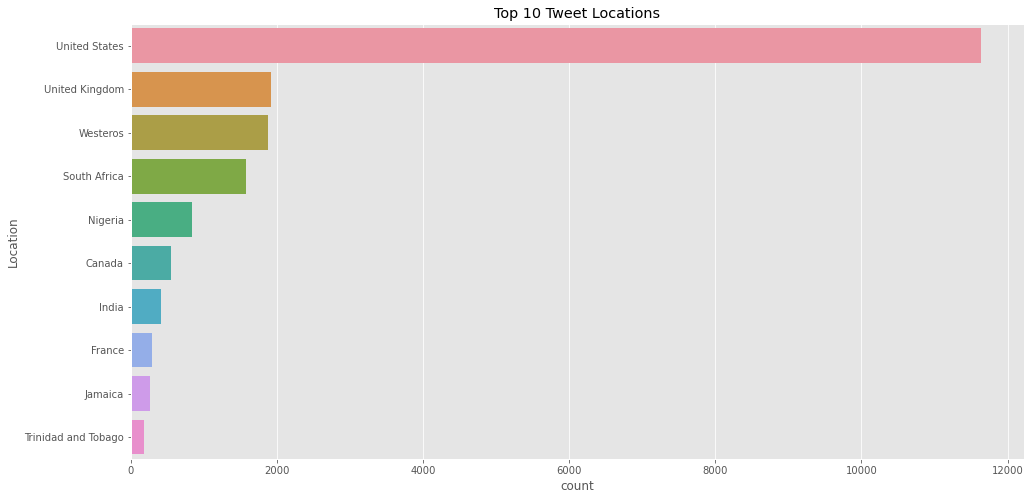

In [669]:
#visualization for top 10 tweet locations
fig, axes = plt.subplots(figsize = (16,8))
sns.countplot(y='Location', data= hotd, order= hotd['Location'].value_counts().
              head(10).index).set(title='Top 10 Tweet Locations')

## 5. Text Processing

At this stage, text is converted into machine readable form using a suite of libraries from the NLTK tool kit. Techniques such as stop words, tokenization, and stemming were applied.

In [670]:
#first step in text processing is to taking out stopwords from the text using NLTK stop_words method
#stop words are common words in english that add little or no value in NLP
stop_words = list(stopwords.words('english'))

#user defined common words that do not add value in the context of the show will also be removed
hotd_stop_words = ['house','GOT','thrones','lady','lord','ser','gameofthrones', 'hotd',
                   'premiere','watching','got','episode','serie','houseofthedragon',
                   'fan','hbo','hbomax','finale', 'end', 'getting', 'today', 'week','watch',
                   'stream', 'houseofdragon', 'houseofthedragonhbo','houseofthedragonep']

other_stop_words = ['im','say', 'said', 'seen','see','watched','ive','cant wait', 'doesnt', 'even','youre', 'last','night',
                    'ok','dont' 'im','wanna', 'gonna', 'though', 'they', 'like', 'really', 'shes', 'get', 'one','still',
                   'went', 'seeing', 'cant', 'isnt', 'e', 'u', 'wanna', 'many', 'done', 'wasnt', 'let', 'done', 'dont']

stop_words = stop_words + hotd_stop_words + other_stop_words

In [ ]:
# text pre-processing - cleaning unstructured texts for analysis
def preprocessing(text):
    text = text.lower() #text to lower case
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE) #removes url
    text = re.sub(r'\@w+|\#','',text) #removeshashtags
    text = re.sub(r'[^\w\s]','',text) #replaces unwanted strings
    text = re.sub(r'@[^ ]+', '', text) #removes username
    text = re.sub(r'([A-Za-z])\1{2,}', r'\1', text) #normalizes word e.g todaaaaay as today
    text = re.sub(r'[^A-Za-z ]', '', text) #punctuations, special characters, numbers
    text = text.replace("[^a-zA-Z]", " ")
    text_tokens = word_tokenize(text) #applying tokenization
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [671]:
#viewing first 1000 words of processing text
Processed_Text = preprocessing(text)
Processed_Text[:1000]

'hotdsource thank grrmspeaking loving show current favorite serieshouseofdragonlahouseofthedragon drawing draw sketch ilustracion illustration sketchbook oc digitalart comic fanart artoftheday digitaldrawing art double literally face ouija amazonhelp tedvillavicenc also hell wrong stop writing stuff pulling platforms tax writeoffs fucking bullshitill pull plug subscription start pirating seasons er every seeking friends want scour internet searching jewelry accessories worn shall start private discord fb group serious applicants leads housetargaryen dracarys dracatrys dracarys catsoftwitter new data reveals prime videos rings theringsofpower beat hbos viewership first wait scene especially united familyhousetargaryen housevelaryon househightower emily carey put lot commitment role people need learn clearly tv version alicenthightower copy book emily olivia brought new takes character better understand feelings actually hater daemontargaryen x wan na feel inside xhotd killed rhaenyras b

In [672]:
#adding new column for processed text into hotd_df
hotd_df['Processed_Text'] = hotd_df['Text'].apply(preprocessing)
hotd_df.head()

,Location,Text,Processed_Text
0,Massachusetts,@HOTDsource Thank you! @GRRMspeaking #houseofthedragon loving the show!,hotdsource thank grrmspeaking loving show
1,Spain 🇪🇸,The House of dragon is being one of my current favorite series\n\n@HouseofDragonLA\n\n#houseofthedragon #GOT #gameofthrones #drawing #draw #sketch #ilustracion #illustration #sketchbook #oc #digitalart #comic #fanart #artoftheday #digitaldrawing #hotd #art #hbo https://t.co/RWxef6ZJ7v,dragon current favorite serieshouseofdragonlahouseofthedragon drawing draw sketch ilustracion illustration sketchbook oc digitalart comic fanart artoftheday digitaldrawing art
2,Spain 🇪🇸,"Episode 4, double 😱😱 literally my face #HouseOfTheDragon",double literally face
3,"Utah, USA",Queen Alicent was in Ouija? 😨\n#HouseofTheDragon https://t.co/CrFFT0vhMV,queen alicent ouija
4,"Utah, USA","@AmazonHelp @TedVillavicenc Also @HBOMAX, what the hell is wrong with YOU, stop writing off stuff and pulling them from platforms for tax write-offs. It's fucking bullshit.\n\nI'll pull the plug on my subscription and will start pirating all the seasons of ER and every episode of #HouseOfTheDragon",amazonhelp tedvillavicenc also hell wrong stop writing stuff pulling platforms tax writeoffs fucking bullshitill pull plug subscription start pirating seasons er every


In [673]:
#stemming - reducing words to the root form for purpose of processing
stemmer = PorterStemmer()
def stemming(data):
    Processed_Text = [stemmer.stem(word) for word in data]
    return data
#appling stemmed column to hotd_df
hotd_df['Processed_Text'] = hotd_df['Processed_Text'].apply(lambda x: stemming(x))
hotd_df.head()

,Location,Text,Processed_Text
0,Massachusetts,@HOTDsource Thank you! @GRRMspeaking #houseofthedragon loving the show!,hotdsource thank grrmspeaking loving show
1,Spain 🇪🇸,The House of dragon is being one of my current favorite series\n\n@HouseofDragonLA\n\n#houseofthedragon #GOT #gameofthrones #drawing #draw #sketch #ilustracion #illustration #sketchbook #oc #digitalart #comic #fanart #artoftheday #digitaldrawing #hotd #art #hbo https://t.co/RWxef6ZJ7v,dragon current favorite serieshouseofdragonlahouseofthedragon drawing draw sketch ilustracion illustration sketchbook oc digitalart comic fanart artoftheday digitaldrawing art
2,Spain 🇪🇸,"Episode 4, double 😱😱 literally my face #HouseOfTheDragon",double literally face
3,"Utah, USA",Queen Alicent was in Ouija? 😨\n#HouseofTheDragon https://t.co/CrFFT0vhMV,queen alicent ouija
4,"Utah, USA","@AmazonHelp @TedVillavicenc Also @HBOMAX, what the hell is wrong with YOU, stop writing off stuff and pulling them from platforms for tax write-offs. It's fucking bullshit.\n\nI'll pull the plug on my subscription and will start pirating all the seasons of ER and every episode of #HouseOfTheDragon",amazonhelp tedvillavicenc also hell wrong stop writing stuff pulling platforms tax writeoffs fucking bullshitill pull plug subscription start pirating seasons er every


## 6. Most Popular Characters

What is a show without good characters? You guessed right NOTHING. One of the biggest success drivers for any show is how passionate fans are about the characters and HOTD was no exception.

A list was created with the names of the main characters then the str.replace method to correct common spelling mistakes. The next step was to create a dataframe containing character names and word count of how often they were mentioned in the text.

In [674]:
#selecting main characters from HOTD show
hotd_chars = ['rhaenyra', 'daemon','alicent', 'otto', 'viserys', 'rhaenys','vaemond', 'lucerys', 'jacaerys', 'lyonel',
                   'corlys','aegon', 'aemond', 'larys','harwin','laenor', 'laena', 'criston', 'mysaria', 'helaena']

In [675]:
#replacing mispellings and nicknames of character names with actual names
hotd_df['Text'] = hotd_df['Text'].str.replace('rhaneyra','rhaenyra')
hotd_df['Text'] = hotd_df['Text'].str.replace('rhaneyras','rhaenyra')
hotd_df['Text'] = hotd_df['Text'].str.replace('rhaneyratargaryen','rhaenyra')
hotd_df['Text'] = hotd_df['Text'].str.replace('visery','viserys')
hotd_df['Text'] = hotd_df['Text'].str.replace('viseryss','viserys')
hotd_df['Text'] = hotd_df['Text'].str.replace('deamon','daemon')
hotd_df['Text'] = hotd_df['Text'].str.replace('daemontargaryen','daemon')
hotd_df['Text'] = hotd_df['Text'].str.replace('jace','jacaerys')
hotd_df['Text'] = hotd_df['Text'].str.replace('luke','lucerys')
hotd_df['Text'] = hotd_df['Text'].str.replace('cole','criston')
hotd_df['Text'] = hotd_df['Text'].str.replace('sea snake','corlys')
hotd_df['Text'] = hotd_df['Text'].str.replace('rhaneys','rhaenys')
hotd_df['Text'] = hotd_df['Text'].str.replace('leana','laena')
hotd_df['Text'] = hotd_df['Text'].str.replace('leanor','laenor')
hotd_df['Text'] = hotd_df['Text'].str.replace('vemond','vaemond')
hotd_df['Text'] = hotd_df['Text'].str.replace('dracary','dracarys')

In [676]:
#pulling out main characters in each text column
def getMainChar(Text):
    text = Text.lower()
    text_tokens = word_tokenize(text)
    main_chars = [char for char in text_tokens if char in hotd_chars]
    return " ".join(main_chars)
# creating new column in hotd_df showing occurence of main characters in text column
hotd_df['main_chars'] = hotd_df['Text'].apply(getMainChar)
hotd_df.head()

,Location,Text,Processed_Text,main_chars
0,Massachusetts,@HOTDsource Thank you! @GRRMspeaking #houseofthedragon loving the show!,hotdsource thank grrmspeaking loving show,
1,Spain 🇪🇸,The House of dragon is being one of my current favorite series\n\n@HouseofDragonLA\n\n#houseofthedragon #GOT #gameofthrones #drawing #draw #sketch #ilustracion #illustration #sketchbook #oc #digitalart #comic #fanart #artoftheday #digitaldrawing #hotd #art #hbo https://t.co/RWxef6ZJ7v,dragon current favorite serieshouseofdragonlahouseofthedragon drawing draw sketch ilustracion illustration sketchbook oc digitalart comic fanart artoftheday digitaldrawing art,
2,Spain 🇪🇸,"Episode 4, double 😱😱 literally my face #HouseOfTheDragon",double literally face,
3,"Utah, USA",Queen Alicent was in Ouija? 😨\n#HouseofTheDragon https://t.co/CrFFT0vhMV,queen alicent ouija,alicent
4,"Utah, USA","@AmazonHelp @TedVillavicenc Also @HBOMAX, what the hell is wrong with YOU, stop writing off stuff and pulling them from platforms for tax write-offs. It's fucking bullshit.\n\nI'll pull the plug on my subscription and will start pirating all the seasons of ER and every episode of #HouseOfTheDragon",amazonhelp tedvillavicenc also hell wrong stop writing stuff pulling platforms tax writeoffs fucking bullshitill pull plug subscription start pirating seasons er every,


In [677]:
#total occurence of character names in Text column
char_count = hotd_df['main_chars'].value_counts()[hotd_chars]

#create df from result
char_count2 = pd.DataFrame(list(zip(hotd_chars, char_count)),columns =['main_char', 'no_of_occur'])
char_count2.sort_values(by='no_of_occur', ascending=False, inplace=True)
char_count2.head()

,main_char,no_of_occur
2,alicent,6197
0,rhaenyra,4345
1,daemon,3759
4,viserys,3007
17,criston,2981


In [678]:
#visualizing most popular characters using plotly graph
fig = px.bar(char_count2, x = 'main_char' , y = 'no_of_occur', color = 'no_of_occur',title = 'Most Popular Characters' )
fig.update_xaxes(title_text = 'Character Names')
fig.update_yaxes(title_text = 'Mentions')
fig.show()

## 7. Sentiment Analysis

Textblob is a NLP python library used to analyze unstructured data in textual form.The library gives 2 outputs called polarity and subjectivity. 

Polarity - This ranges from -1 to 1, where -1 refers to negative sentiment and +1 refers to positive sentiment.

Subjectivity -  This measures if a statement shows the writers personal opinions and beliefs, or if it is factual. The score lies between 0 (fact) and 1 (personal opinion). 

New columns will be created for these outputs to guage the polarity and objectivity of words in the Processed_Text column.

In [679]:
#creating a df with only the Processed_text column
hotd_df2 = hotd_df.drop(columns = ['Location', 'Text', 'main_chars'], axis = 1)

hotd_df2.head()

,Processed_Text
0,hotdsource thank grrmspeaking loving show
1,dragon current favorite serieshouseofdragonlahouseofthedragon drawing draw sketch ilustracion illustration sketchbook oc digitalart comic fanart artoftheday digitaldrawing art
2,double literally face
3,queen alicent ouija
4,amazonhelp tedvillavicenc also hell wrong stop writing stuff pulling platforms tax writeoffs fucking bullshitill pull plug subscription start pirating seasons er every


### Polarity

In [680]:
#Calculating text polarity using TextBlob
def polarity(Processed_Text):
    return TextBlob(Processed_Text).sentiment.polarity

In [681]:
#Add polarity score to df
hotd_df2['Polarity'] = hotd_df2['Processed_Text'].apply(polarity)
hotd_df2.head()

,Processed_Text,Polarity
0,hotdsource thank grrmspeaking loving show,0.60
1,dragon current favorite serieshouseofdragonlahouseofthedragon drawing draw sketch ilustracion illustration sketchbook oc digitalart comic fanart artoftheday digitaldrawing art,0.25
2,double literally face,0.00
3,queen alicent ouija,0.00
4,amazonhelp tedvillavicenc also hell wrong stop writing stuff pulling platforms tax writeoffs fucking bullshitill pull plug subscription start pirating seasons er every,-0.55


In [682]:
#Creating polarity sentiment column
def p_sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [683]:
#Add sentiment column to df
hotd_df2['P_Sentiment'] = hotd_df2['Polarity'].apply(p_sentiment)
hotd_df2.head()

,Processed_Text,Polarity,P_Sentiment
0,hotdsource thank grrmspeaking loving show,0.60,Positive
1,dragon current favorite serieshouseofdragonlahouseofthedragon drawing draw sketch ilustracion illustration sketchbook oc digitalart comic fanart artoftheday digitaldrawing art,0.25,Positive
2,double literally face,0.00,Neutral
3,queen alicent ouija,0.00,Neutral
4,amazonhelp tedvillavicenc also hell wrong stop writing stuff pulling platforms tax writeoffs fucking bullshitill pull plug subscription start pirating seasons er every,-0.55,Negative


In [684]:
#polarity count
P_Sent_Count = hotd_df2['P_Sentiment'].value_counts()
P_Sent_Count

Neutral     55432
Positive    39204
Negative    24720
Name: P_Sentiment, dtype: int64

In [685]:
import plotly.graph_objects as go

labels = ['Neutral','Postive','Negative']
values = [55432, 39204, 24720]

#creating donut-like pie chart using plotly
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update(layout_title_text = 'Polarity Sentiment Distribution %')
fig.show()

### Subjectivity

In [686]:
#Calculating text subjectivity using TextBlob
def subjectivity(Processed_Text):
    return TextBlob(Processed_Text).sentiment.subjectivity

In [687]:
#Add subjectivity score to df
hotd_df2['Subjectivity'] = hotd_df['Processed_Text'].apply(subjectivity)
hotd_df2.head()

,Processed_Text,Polarity,P_Sentiment,Subjectivity
0,hotdsource thank grrmspeaking loving show,0.60,Positive,0.950000
1,dragon current favorite serieshouseofdragonlahouseofthedragon drawing draw sketch ilustracion illustration sketchbook oc digitalart comic fanart artoftheday digitaldrawing art,0.25,Positive,0.633333
2,double literally face,0.00,Neutral,0.000000
3,queen alicent ouija,0.00,Neutral,0.000000
4,amazonhelp tedvillavicenc also hell wrong stop writing stuff pulling platforms tax writeoffs fucking bullshitill pull plug subscription start pirating seasons er every,-0.55,Negative,0.850000


In [688]:
#Creating polarity sentiment column
def s_sentiment(label):
    if label <0.5:
        return "Objective"
    elif label ==0.5:
        return "Objective"
    elif label>0.5:
        return "Subjective"

In [689]:
#Add sentiment column to df
hotd_df2['S_Sentiment'] = hotd_df2['Subjectivity'].apply(s_sentiment)
hotd_df2.head()

,Processed_Text,Polarity,P_Sentiment,Subjectivity,S_Sentiment
0,hotdsource thank grrmspeaking loving show,0.60,Positive,0.950000,Subjective
1,dragon current favorite serieshouseofdragonlahouseofthedragon drawing draw sketch ilustracion illustration sketchbook oc digitalart comic fanart artoftheday digitaldrawing art,0.25,Positive,0.633333,Subjective
2,double literally face,0.00,Neutral,0.000000,Objective
3,queen alicent ouija,0.00,Neutral,0.000000,Objective
4,amazonhelp tedvillavicenc also hell wrong stop writing stuff pulling platforms tax writeoffs fucking bullshitill pull plug subscription start pirating seasons er every,-0.55,Negative,0.850000,Subjective


In [690]:
#subjectivity count
S_Sent_Count = hotd_df2['S_Sentiment'].value_counts()
S_Sent_Count

Objective     80313
Subjective    39043
Name: S_Sentiment, dtype: int64

[Text(0.5, 1.0, 'Subjectivity Scores')]

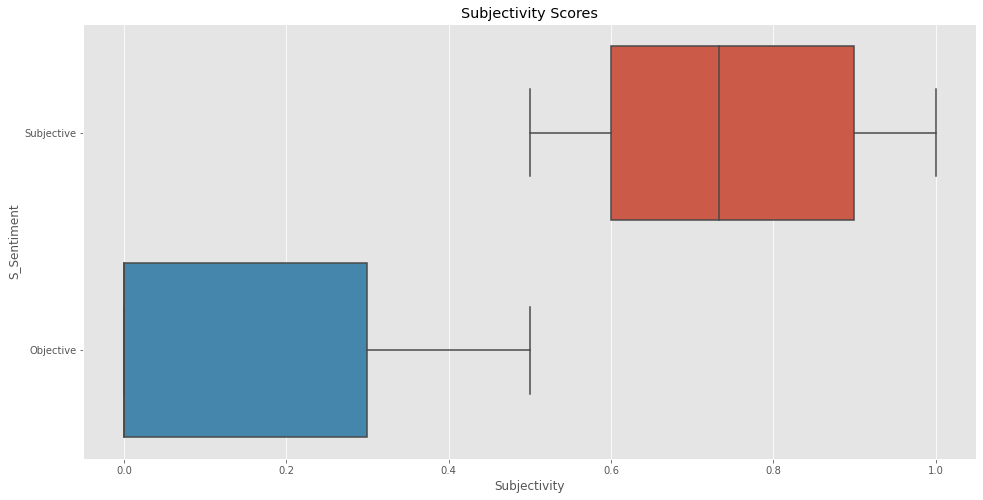

In [696]:
#vizualizing Subjectivity Distributio
fig, axes = plt.subplots(figsize = (16,8))
sns.boxplot(x="Subjectivity",y="S_Sentiment", data = hotd_df2).set(title='Subjectivity Scores')

## 8.  Word Distribution

The concluding part this project involves creating a dataframe containing most used word using the FreqDist() method. After this, the most common words will be displayed in a wordcloud.

In [699]:
#Frequency distribution of Words
words: list[str] = nltk.word_tokenize(Processed_Text)
top_words = nltk.FreqDist(words)

In [700]:
#creating a df containing top words
top_words_df = pd.DataFrame(list(top_words.most_common()), columns = ["Word","Frequency"])
top_words_df.head(10)

,Word,Frequency
0,show,6093
1,new,5984
2,amp,5959
3,love,5808
4,know,5550
5,good,5275
6,targaryen,5027
7,man,4695
8,demdragons,4691
9,tvtime,4551


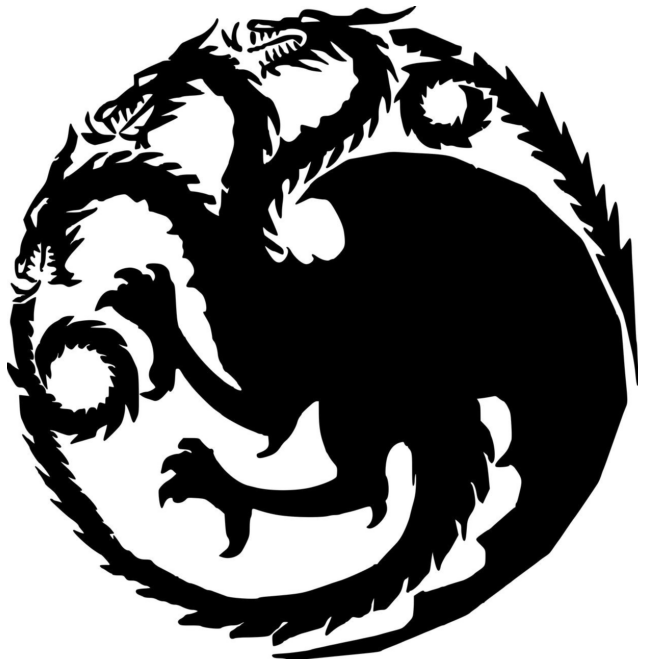

In [703]:
#importing word cloud image from directory
mask = np.array(Image.open("C:\\Users\\ofagb\\Downloads\\GOT.jpg"))
plt.figure(figsize = (18,12))
plt.imshow(mask, interpolation='bilinear') 
plt.axis('off') 
plt.show() 

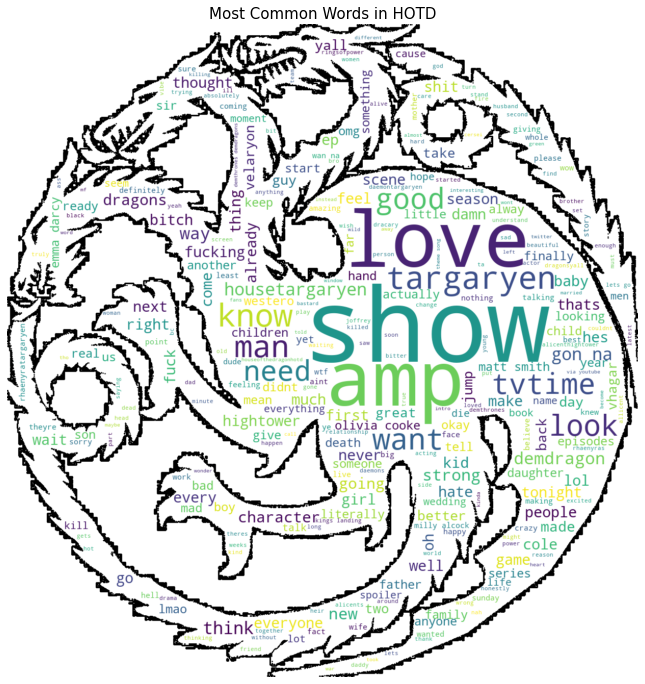

In [705]:
#create word cloud
masked_wordcloud = WordCloud(background_color = 'white', contour_color = 'black', contour_width = 3,
                             min_font_size = 8, max_words = 300, mask = mask)
masked_wordcloud.generate(Processed_Text)
plt.figure(figsize = (18,12))
plt.imshow(masked_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most Common Words in HOTD', fontsize=15)
plt.show()

# CONCLUSION

This project was fun because I was able to implement all I learnt on NLP arm of machine learning on a topic I am passionate about. Learning to use SNSCRAPE to mine data from twitter and also creating vizualizations using the plotly packages were also interesting. Definitely looking forward to more NLP projects. 

Till #HouseoftheDragon season 2 returns in 2024, all I can say is DRACARYS.....